In [1]:
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [2]:
housing = pd.read_csv('house.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing[['population', 'ocean_proximity']][housing['ocean_proximity'] == 'ISLAND']

,population,ocean_proximity
8314,744.0,ISLAND
8315,1100.0,ISLAND
8316,733.0,ISLAND
8317,341.0,ISLAND
8318,422.0,ISLAND


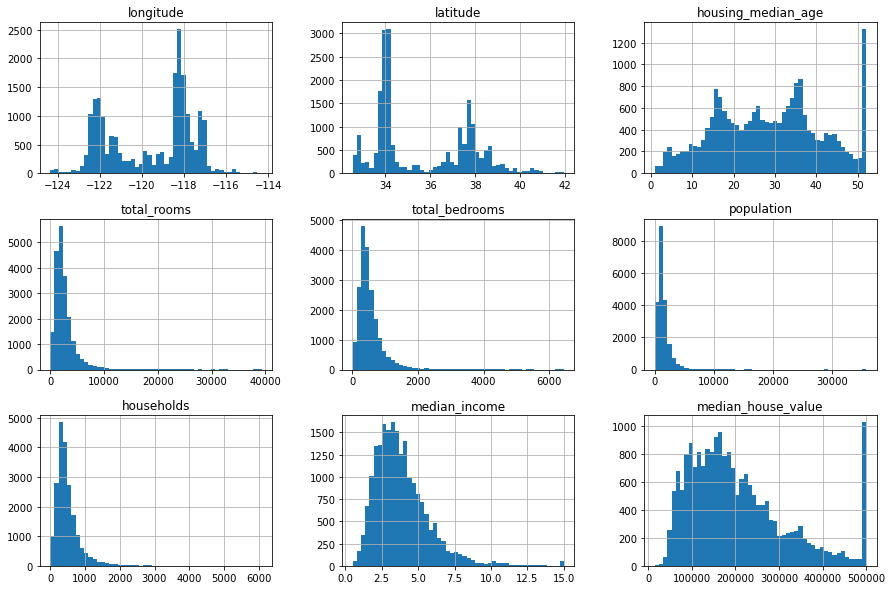

In [4]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

In [5]:
train_set, test_set = train_test_split(housing, test_size=0.3, random_state=49)
print('The shape of training sets:', train_set.shape)
print('The shape of test sets:', test_set.shape)

The shape of training sets: (14448, 10)
The shape of test sets: (6192, 10)


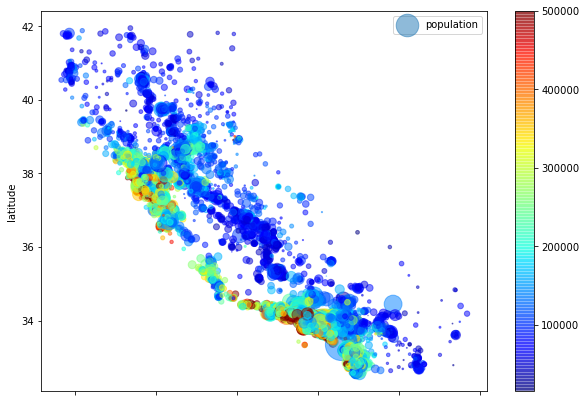

In [6]:
data = train_set.copy()
data.plot(kind='scatter', x='longitude', y='latitude', figsize=(10,7),
         s=data['population']/35, label='population', alpha=0.5,
         c=data['median_house_value'], cmap=plt.get_cmap('jet'))
plt.show()

In [7]:
# standard correlation coefficient 'relationen mellan olika kolumner'

corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687635
total_rooms           0.140477
housing_median_age    0.103601
households            0.072186
total_bedrooms        0.057171
population           -0.018729
longitude            -0.044530
latitude             -0.145992
Name: median_house_value, dtype: float64

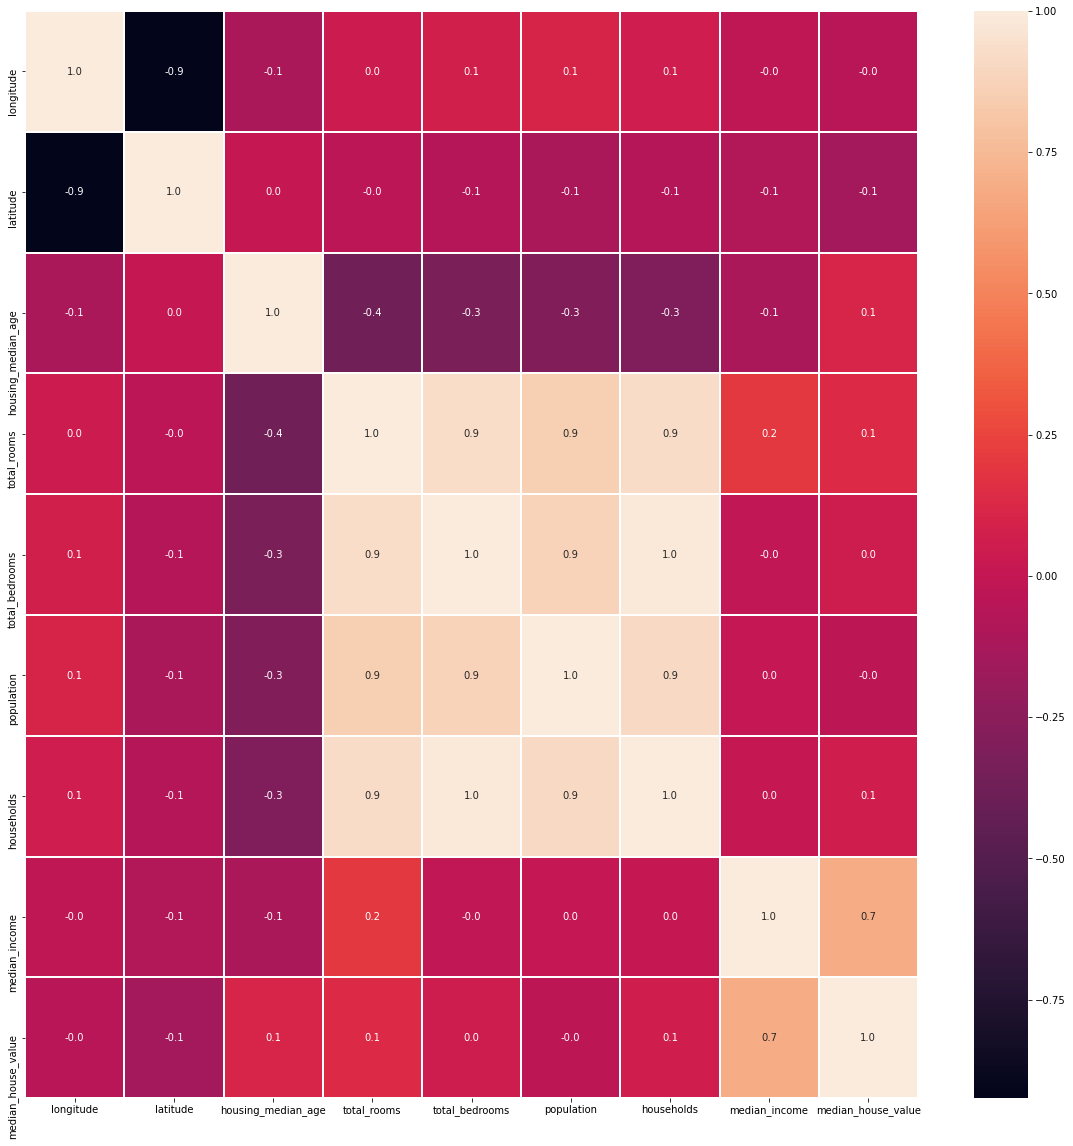

In [8]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(housing.corr(), annot=True, linewidths=1, fmt='.1f', ax=ax)
plt.show()

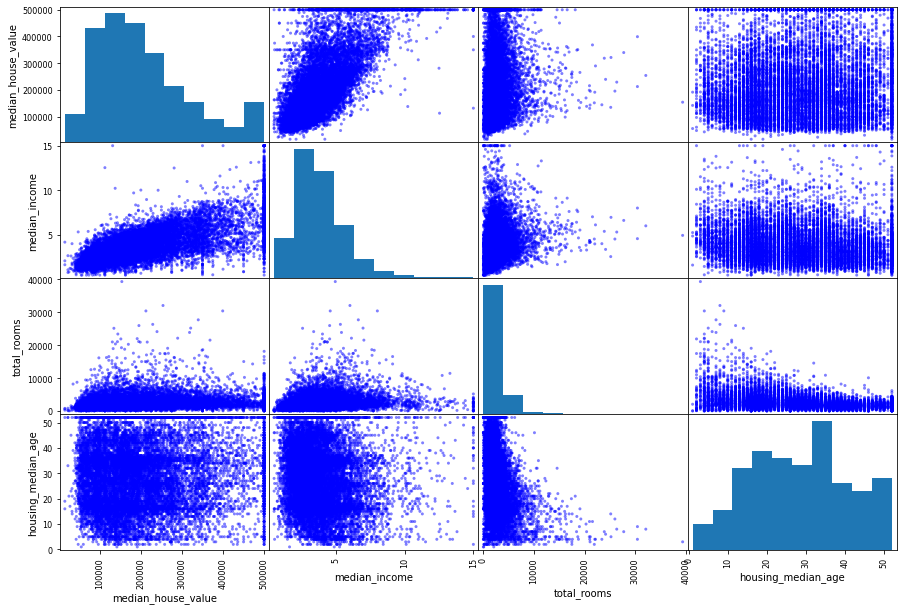

In [9]:
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(data[features], figsize=(15,10), c='blue')
plt.show()

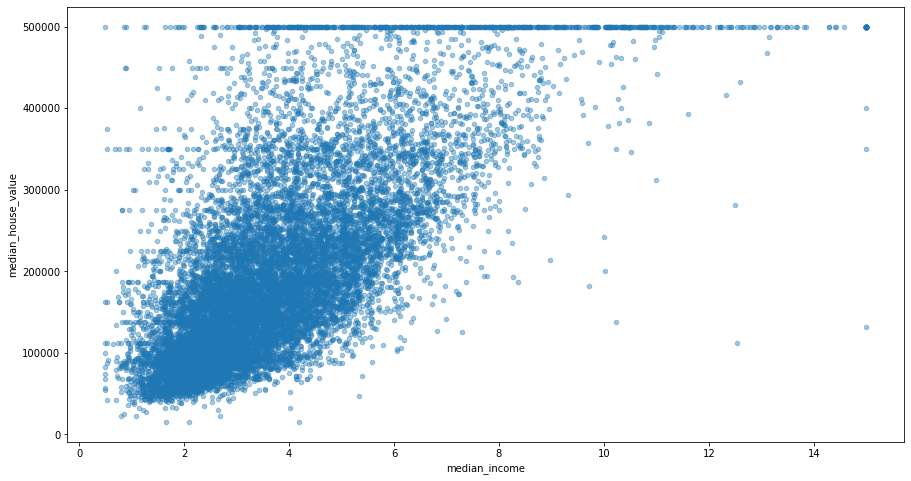

In [10]:
data.plot(kind='scatter', x='median_income', y='median_house_value', figsize=(15,8), alpha=0.4)
plt.show()

In [11]:
# lägger till nya kolumner som vi delar 'total_rooms' med antalet 'households'

data['total_rooms_per_households'] = data['total_rooms']/data['households']
data['total_bedrooms_per_rooms'] = data['total_bedrooms']/data['total_rooms']
data['population_per_household'] = data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_rooms_per_households,total_bedrooms_per_rooms,population_per_household
19696,-121.62,39.11,5.0,2320.0,502.0,1245.0,489.0,3.2465,97200.0,INLAND,4.744376,0.216379,2.546012
15698,-122.46,37.79,52.0,899.0,96.0,304.0,110.0,14.2959,500001.0,NEAR BAY,8.172727,0.106785,2.763636
4002,-118.66,34.18,25.0,6612.0,857.0,2519.0,843.0,8.3912,419000.0,<1H OCEAN,7.843416,0.129613,2.988138
14832,-117.09,32.67,31.0,2051.0,549.0,1581.0,538.0,2.0520,108900.0,NEAR OCEAN,3.812268,0.267674,2.938662
254,-122.20,37.77,49.0,2272.0,498.0,1621.0,483.0,2.4338,102400.0,NEAR BAY,4.703934,0.219190,3.356108


In [12]:
corr_matrix = data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.687635
total_rooms_per_households    0.145908
total_rooms                   0.140477
housing_median_age            0.103601
households                    0.072186
total_bedrooms                0.057171
population                   -0.018729
population_per_household     -0.024197
longitude                    -0.044530
latitude                     -0.145992
total_bedrooms_per_rooms     -0.253621
Name: median_house_value, dtype: float64

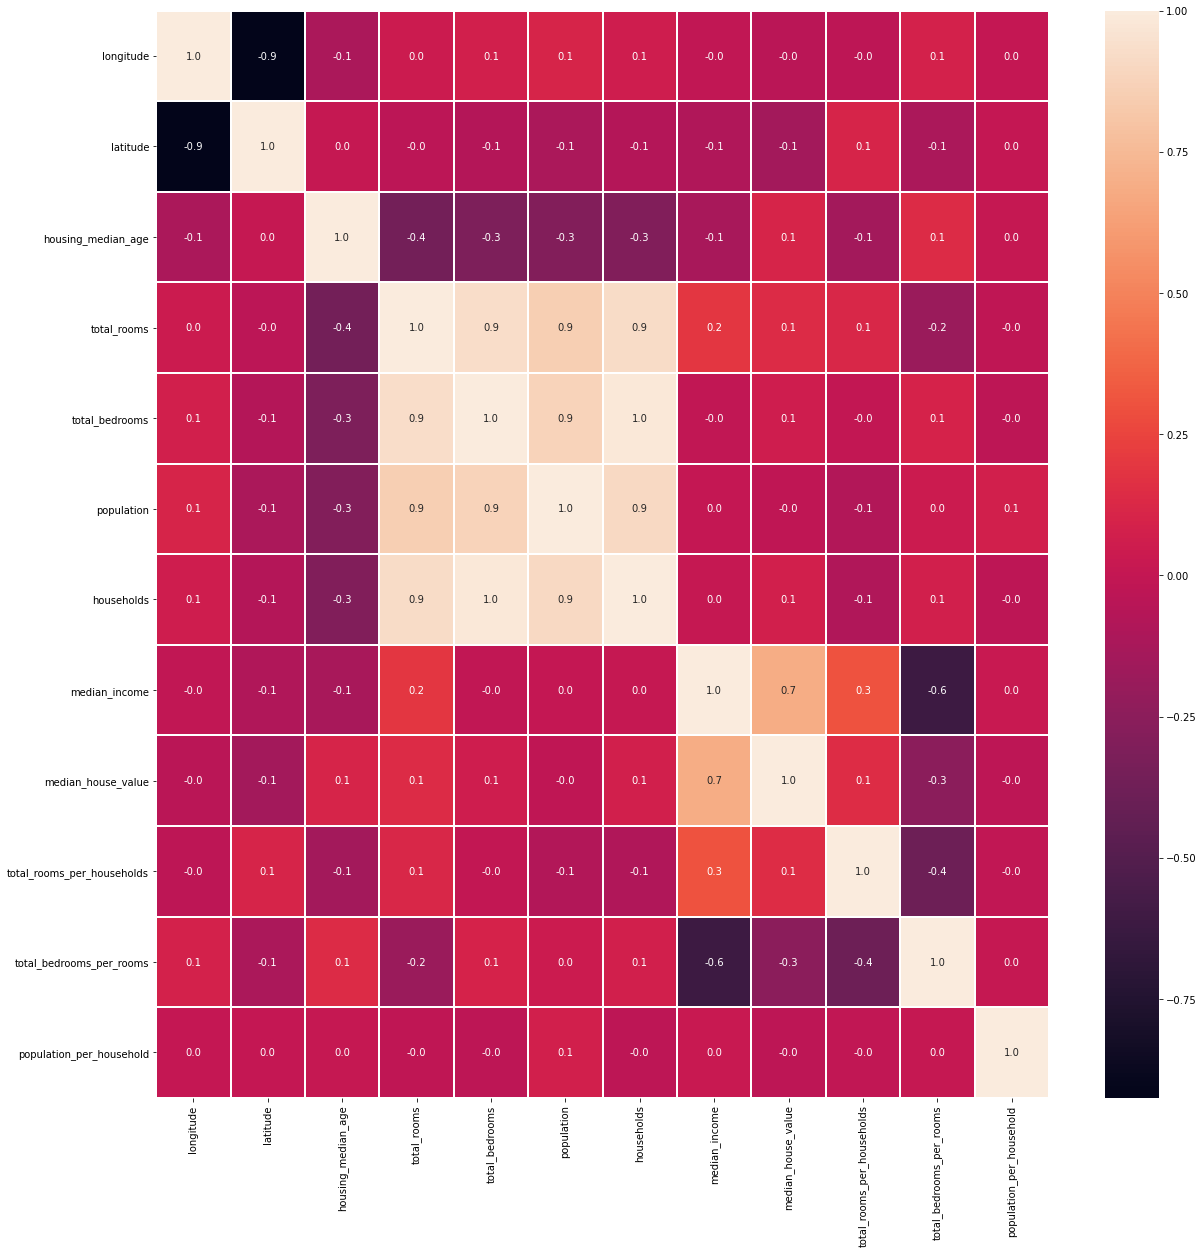

In [13]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt='.1f', ax=ax)
plt.show()

In [14]:
# =========================================== Prepare the Data =================================================
# ================= Numerical data ====>>> Missing Values
# ================= Categorical/Text data ====>>> OneHotEncoder
# ================= Numerical data ====>>> Feature scaling
# ================= Numerical data ====>>> Custom Transform


# =========================================== SimpleImputer ====================================================
df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)
df_num = df.drop('ocean_proximity', axis=1)

# Missing Data

simputer = SimpleImputer(missing_values=np.nan, strategy='median')
simputer.fit(df_num)
X = simputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(X, columns=df_num.columns)
df_num_impute_tr.head()


# =========================================== Custom Transformers ====================================================

rooms, bedrooms, population, household = 3, 4, 5, 6  # indexer

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms] / X[:, household]
        population_per_household = X[:, population] / X[:, household]
        bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
custom = CombinedAttributeAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values)
data_custom_tr = pd.DataFrame(data_custom_tr_tmp)
columns = list(df_num_impute_tr.columns)
columns.append('rooms_per_household')
columns.append('population_per_household')
columns.append('bedrooms_per_room')
data_custom_tr.columns = columns
data_custom_tr.head()


# =========================================== Feature Scaling ====================================================

feature_scal = StandardScaler()
data_num_scaled_tr = pd.DataFrame(feature_scal.fit_transform(data_custom_tr.values), columns=data_custom_tr.columns)
data_num_scaled_tr.head()
# =========================================== OneHotEncoder ====================================================

encoder_1hot = OneHotEncoder(sparse=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[['ocean_proximity']])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)
data_cat_1hot.columns = encoder_1hot.get_feature_names(['prox'])


final = pd.concat([data_num_scaled_tr, data_cat_1hot], axis=1)
final.rename(columns = {'prox_<1H OCEAN': '<1h_ocean', 'prox_INLAND': 'inland', 
                        'prox_ISLAND': 'island', 'prox_NEAR BAY': 'near_bay', 
                        'prox_NEAR OCEAN': 'near_ocean'}, inplace=True)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1h_ocean,inland,island,near_bay,near_ocean
0,-1.022863,1.625541,-1.875618,-0.143144,-0.079848,-0.156179,-0.025479,-0.333532,-0.264846,-0.046722,0.040694,0.0,1.0,0.0,0.0,0.0
1,-1.442823,1.007562,1.857914,-0.802658,-1.050150,-0.990843,-1.015760,5.478975,1.043499,-0.026092,-1.580769,0.0,0.0,0.0,1.0,0.0
2,0.456994,-0.682514,-0.286881,1.848857,0.768569,0.973855,0.899480,2.372824,0.917826,-0.004809,-1.243032,1.0,0.0,0.0,0.0,0.0
3,1.241919,-1.389444,0.189740,-0.267992,0.032478,0.141852,0.102552,-0.961895,-0.620563,-0.009500,0.799612,0.0,0.0,0.0,0.0,1.0
4,-1.312835,0.998199,1.619604,-0.165422,-0.089408,0.177332,-0.041156,-0.761050,-0.280280,0.030074,0.082280,0.0,0.0,0.0,1.0,0.0


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

rooms, bedrooms, population, household = 3, 4, 5, 6

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms] / X[:, household]
        population_per_household = X[:, population] / X[:, household]
        bedrooms_per_room = X[:, bedrooms] / X[:, rooms]
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    
    
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
df = train_set.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)

df_num = df.drop(['ocean_proximity'], axis=1)
num_attrs = list(df_num)
cat_attrs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('simputer', SimpleImputer(missing_values=np.nan, strategy='median')),  # för att fylla på null värden med median
    ('attribs_adder', CombinedAttributeAdder()),  # lägger till extra kolumner 
    ('std_scaler', StandardScaler()),
    ])


cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrs)),
    ('one_hot_encoder', OneHotEncoder(sparse=False)),  # för att byta till numerisk 
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
    ])

housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns=['longitude', 'latitude', 'housing_median_age', 
                                                              'total_rooms','total_bedrooms', 'population', 
                                                              'households', 'median_income','rooms_per_household', 
                                                              'population_per_household', 'bedrooms_per_room',
                                                              '<1h_ocean', 'inland', 'island', 'near_bay', 'near_ocean'])
housing_prepared_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,<1h_ocean,inland,island,near_bay,near_ocean
0,-1.022863,1.625541,-1.875618,-0.143144,-0.079848,-0.156179,-0.025479,-0.333532,-0.264846,-0.046722,0.040694,0.0,1.0,0.0,0.0,0.0
1,-1.442823,1.007562,1.857914,-0.802658,-1.050150,-0.990843,-1.015760,5.478975,1.043499,-0.026092,-1.580769,0.0,0.0,0.0,1.0,0.0
2,0.456994,-0.682514,-0.286881,1.848857,0.768569,0.973855,0.899480,2.372824,0.917826,-0.004809,-1.243032,1.0,0.0,0.0,0.0,0.0
3,1.241919,-1.389444,0.189740,-0.267992,0.032478,0.141852,0.102552,-0.961895,-0.620563,-0.009500,0.799612,0.0,0.0,0.0,0.0,1.0
4,-1.312835,0.998199,1.619604,-0.165422,-0.089408,0.177332,-0.041156,-0.761050,-0.280280,0.030074,0.082280,0.0,0.0,0.0,1.0,0.0


In [16]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared_df, df_label)

LinearRegression()

In [17]:
sample_data_prepared = housing_prepared_df.iloc[:4]
print('Predicted data:\t', lin_reg.predict(sample_data_prepared))

sample_labels = df_label.iloc[:4]
print('Actual data:\t\t', list(sample_labels))

Predicted data:	 [100496.01987875 659960.39577279 397959.9388475  165760.41565771]
Actual data:		 [97200.0, 500001.0, 419000.0, 108900.0]


In [18]:
from sklearn.metrics import mean_squared_error

# RMSE => Root Mean Squared Error
housing_predictions = lin_reg.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_mse = np.sqrt(lin_mse)
# totala skillnaden med den riktiga priset. 
print('The difference between the price and the average:\t', lin_mse )

The difference between the price and the average:	 68503.4144546272


In [19]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df, df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print('Means there is no error and it returns the exact value: \t',tree_rmse)
print('But decision tree is not good modell it gives wrong results')

Means there is no error and it returns the exact value: 	 0.0
But decision tree is not good modell it gives wrong results



### Linear regression är underfit för att inte gett riktigt resulltatd

### Decisin tree är beroende på data som den tränar på och vilket gör att den är overfitting algorithm

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("==============",model_name,"===============",'\n')
    print('Scores:', scores,'\n')
    print('Mean:', scores.mean(),'\n')
    print('Standard deviation:', scores.std(),'\n')
    print("============================================")

display_scores(trees_rmse_scores, 'Decision Tree Regression')

============== Decision Tree Regression =============== 

Scores: [71857.70775101 74527.16272413 73342.81729408 71381.13207354
 67296.29915148 77316.26889534 76498.84822559 66314.72933431
 71755.7846639  69951.88733302] 

Mean: 72024.26374464075 

Standard deviation: 3402.8066090660536 



In [21]:
# kör samma för linear regression

linear_scores = cross_val_score(lin_reg, housing_prepared_df, df_label, scoring='neg_mean_squared_error', cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)

def display_scores(scores, model_name):
    print("==============",model_name,"===============",'\n')
    print('Scores:', scores,'\n')
    print('Mean:', scores.mean(),'\n')
    print('Standard deviation:', scores.std(),'\n')
    print("============================================")

display_scores(linear_rmse_scores, 'Linear Regression')

============== Linear Regression =============== 

Scores: [67952.18987618 73349.28491012 67765.97444781 67260.12373537
 68196.26916157 69510.94113972 66716.6259603  71803.55783605
 69194.57944683 68660.63624473] 

Mean: 69041.0182758684 

Standard deviation: 1966.7525352424798 



In [22]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared_df, df_label)
forest_scores = cross_val_score(forest_reg, housing_prepared_df, 
                                df_label, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)


def display_scores(scores, model_name):
    print("==============",model_name,"===============",'\n')
    print('Scores:', scores,'\n')
    print('Mean:', scores.mean(),'\n')
    print('Standard deviation:', scores.std(),'\n')
    print("============================================")

display_scores(forest_rmse_scores, 'Random Forest Regression')

============== Random Forest Regression =============== 

Scores: [50750.65818228 52257.08372776 48047.78724366 48773.47596158
 49671.38634042 54247.15832985 52326.13209901 48754.77096097
 50971.03278037 51186.62473305] 

Mean: 50698.61103589586 

Standard deviation: 1831.7108495697369 



In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 4, 6, 10, 30], 'max_features': [2, 6, 8, 15]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df, df_label)

print('Best Parameters: ', grid_search.best_params_)
print('Best Estimators: ', grid_search.best_estimator_)

Best Parameters:  {'max_features': 6, 'n_estimators': 30}
Best Estimators:  RandomForestRegressor(max_features=6, n_estimators=30)


In [24]:
results = grid_search.cv_results_
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_score), params)
    
# Randomized search => RandomizedsearchCV

64835.53319031795 {'max_features': 2, 'n_estimators': 3}
61608.90221833833 {'max_features': 2, 'n_estimators': 4}
58510.82366657853 {'max_features': 2, 'n_estimators': 6}
56424.13525214422 {'max_features': 2, 'n_estimators': 10}
53118.04175903002 {'max_features': 2, 'n_estimators': 30}
59826.589195191234 {'max_features': 6, 'n_estimators': 3}
56549.15108326909 {'max_features': 6, 'n_estimators': 4}
54599.22825460591 {'max_features': 6, 'n_estimators': 6}
52646.897180157874 {'max_features': 6, 'n_estimators': 10}
50478.80824709021 {'max_features': 6, 'n_estimators': 30}
60384.89456546227 {'max_features': 8, 'n_estimators': 3}
56779.99492529175 {'max_features': 8, 'n_estimators': 4}
54630.20112454886 {'max_features': 8, 'n_estimators': 6}
53208.15511841241 {'max_features': 8, 'n_estimators': 10}
50750.445082358885 {'max_features': 8, 'n_estimators': 30}
59543.112210948086 {'max_features': 15, 'n_estimators': 3}
56950.16639398434 {'max_features': 15, 'n_estimators': 4}
55209.601800900025 

In [25]:
# Test the final model on the test set
final_model = grid_search.best_estimator_
X = test_set.drop('median_house_value', axis=1)
y = test_set['median_house_value'].copy()
X_prepared = full_pipeline.transform(X)
final_predictions = final_model.predict(X_prepared)
final_mse = mean_squared_error(y, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49120.71746142606

In [26]:
import pickle
with open('house_modell.pkl', 'wb') as file:
    pickle.dump(final_rmse, file)